In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns

In [55]:
diabetes = pd.read_csv('diabetes.csv')

In [56]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
#checking class baalnce
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [78]:
#dropping outliers (0s in places that shouldn't be 0s)
diabetes_cleaned = diabetes[diabetes.SkinThickness != 0]
diabetes_cleaned = diabetes_cleaned[diabetes.BMI != 0]
diabetes_cleaned = diabetes_cleaned[diabetes.BloodPressure != 0]
diabetes_cleaned = diabetes_cleaned[diabetes.Insulin != 0]

c:\users\abhim\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\abhim\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\abhim\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Age Distribution')

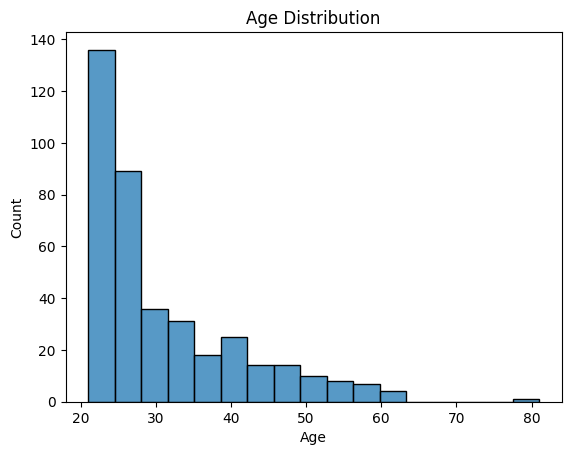

In [79]:
#plotting
sns.histplot(x= 'Age',
             data=diabetes_cleaned).set_title("Age Distribution")

Text(0.5, 1.0, 'Blood Pressure Distribution')

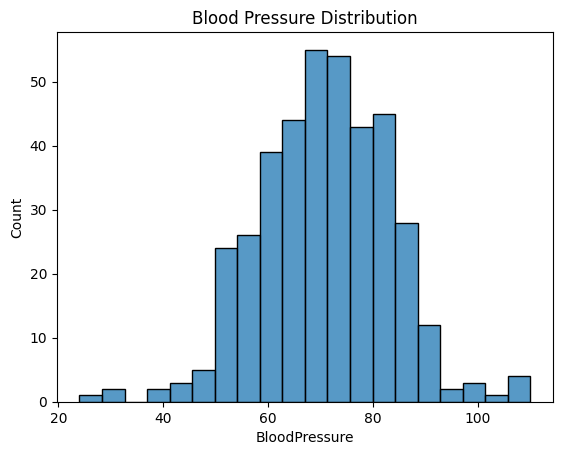

In [80]:
sns.histplot(x= 'BloodPressure',
             data=diabetes_cleaned).set_title("Blood Pressure Distribution")

Text(0.5, 1.0, 'BMI Distribution')

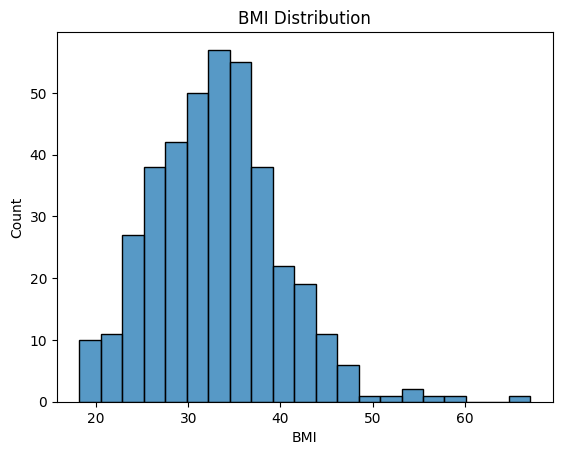

In [81]:
sns.histplot(x= 'BMI',
             data=diabetes_cleaned).set_title("BMI Distribution")

Text(0.5, 1.0, 'Diabetes Outcome Distribution')

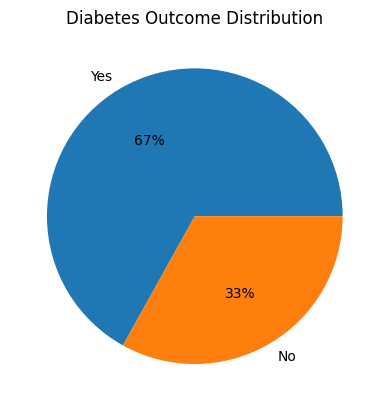

In [82]:
outcome = [263, 130]
keys = ['Yes', 'No']
plt.pie(outcome, labels=keys, autopct='%.0f%%')
plt.title("Diabetes Outcome Distribution", fontdict=None, loc='center', pad=None,)

In [83]:
y = diabetes_cleaned['Outcome']
x = diabetes_cleaned.copy()
x = x.drop('Outcome', axis=1)

In [84]:
#splitting the dataset into 75% train, 25% test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, \
                                                    stratify=y, random_state=5)

In [85]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)

prediction = gnb.predict(x_test)

In [86]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, prediction))
print('Precision:', '%.3f' % precision_score(y_test, prediction))
print('Recall:', '%.3f' % recall_score(y_test, prediction))
print('F1 Score:', '%.3f' % f1_score(y_test, prediction))

Accuracy: 0.758
Precision: 0.667
Recall: 0.545
F1 Score: 0.600


In [87]:
#working with scaled data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fitting scaler to data
scaler.fit(x_train)

#scaling both train and test data
x_train2 = scaler.transform(x_train)

# Scale the test data
x_test2 = scaler.transform(x_test)

In [88]:
# Fit the model
scaled=GaussianNB()
scaled.fit(x_train2, y_train)
scaled_prediction = scaled.predict(x_test2)

In [89]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_prediction))
print('Precision:', '%.3f' % precision_score(y_test,scaled_prediction))
print('Recall:', '%.3f' % recall_score(y_test, scaled_prediction))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_prediction))

Accuracy: 0.758
Precision: 0.667
Recall: 0.545
F1 Score: 0.600


In [70]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()
    
    #from coursera ML course

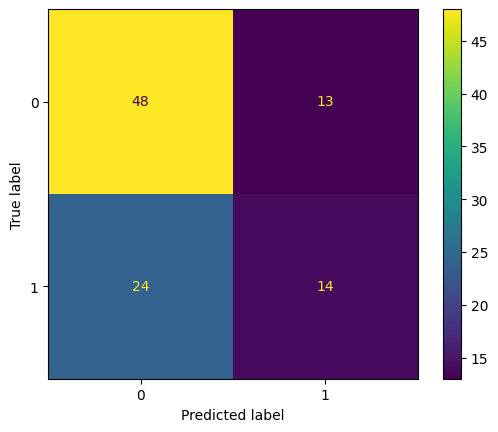

In [109]:
conf_matrix_plot(gnb, x_test, y_test)

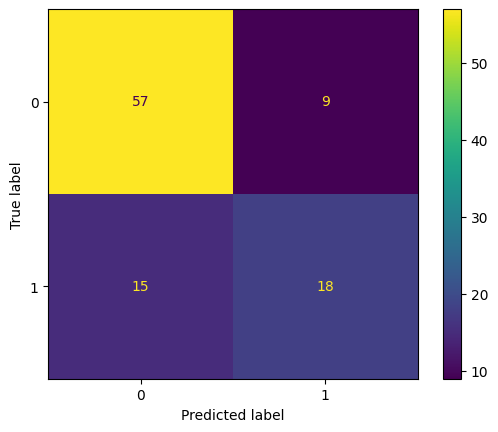

In [91]:
conf_matrix_plot(scaled, x_test2, y_test)

**Decision Tree**

In [92]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# Visualization package imports

In [93]:
df_subset2 = pd.get_dummies(diabetes_cleaned, drop_first=True)
df_subset2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [95]:
y = df_subset2['Outcome']

# Define the X (predictor) variables
X = df_subset2.copy()
X = X.drop('Outcome', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#from coursera ML certificate Decision trees

In [96]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [97]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.707
Precision: 0.655
Recall: 0.500
F1 Score: 0.567


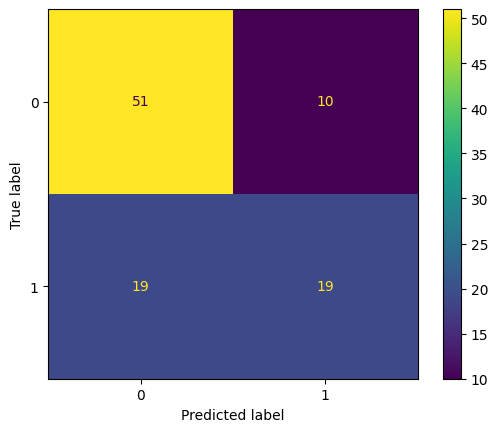

In [98]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

conf_matrix_plot(decision_tree, X_test, y_test)

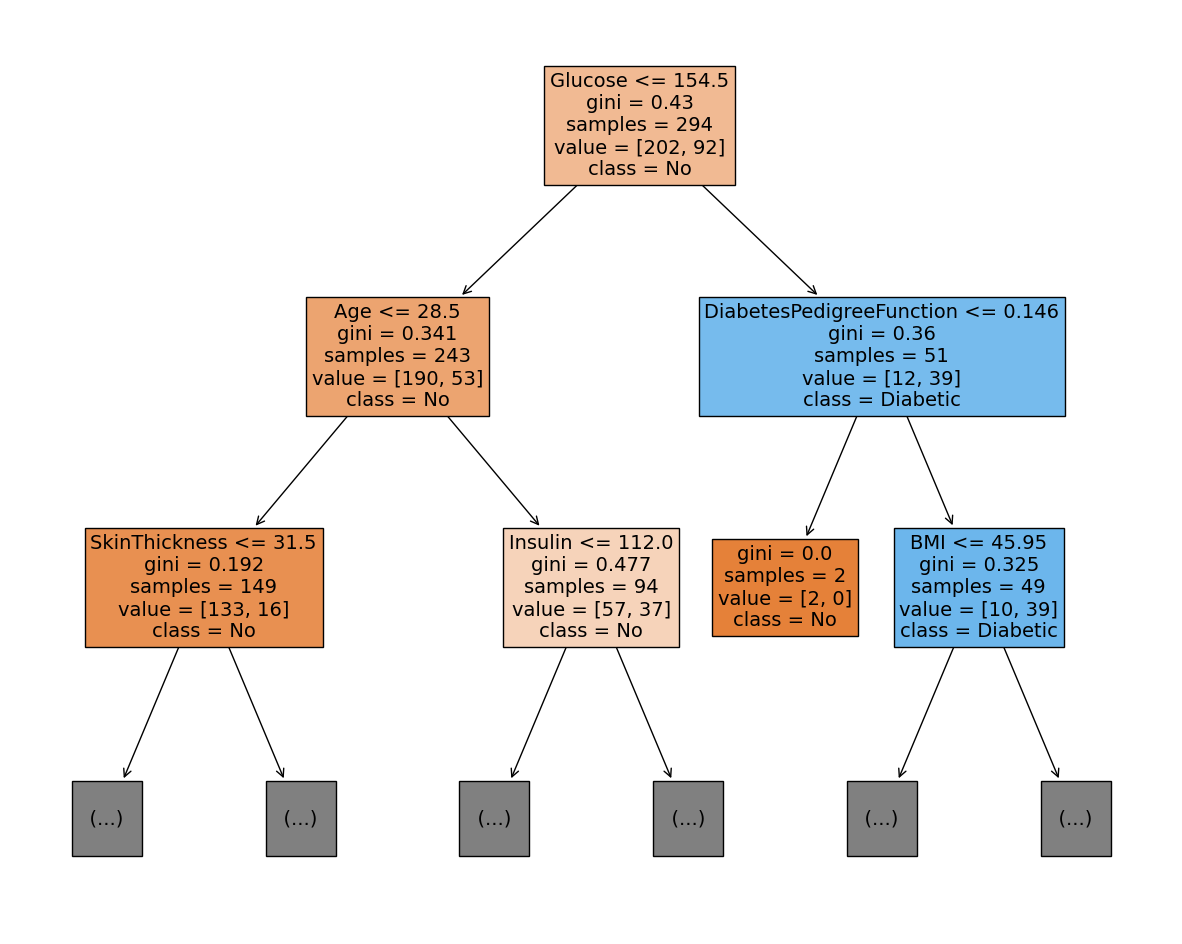

In [111]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'No', 1:'Diabetic'}, filled=True);
plt.show()

In [112]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [113]:
%%time
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

Wall time: 5.82 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'f1', 'accuracy', 'recall', 'precision'})

In [105]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

In [104]:
clf.best_score_

0.6677184183122677

In [106]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

#from coursera ML certificate

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.667718,0.726901,0.622428,0.775395


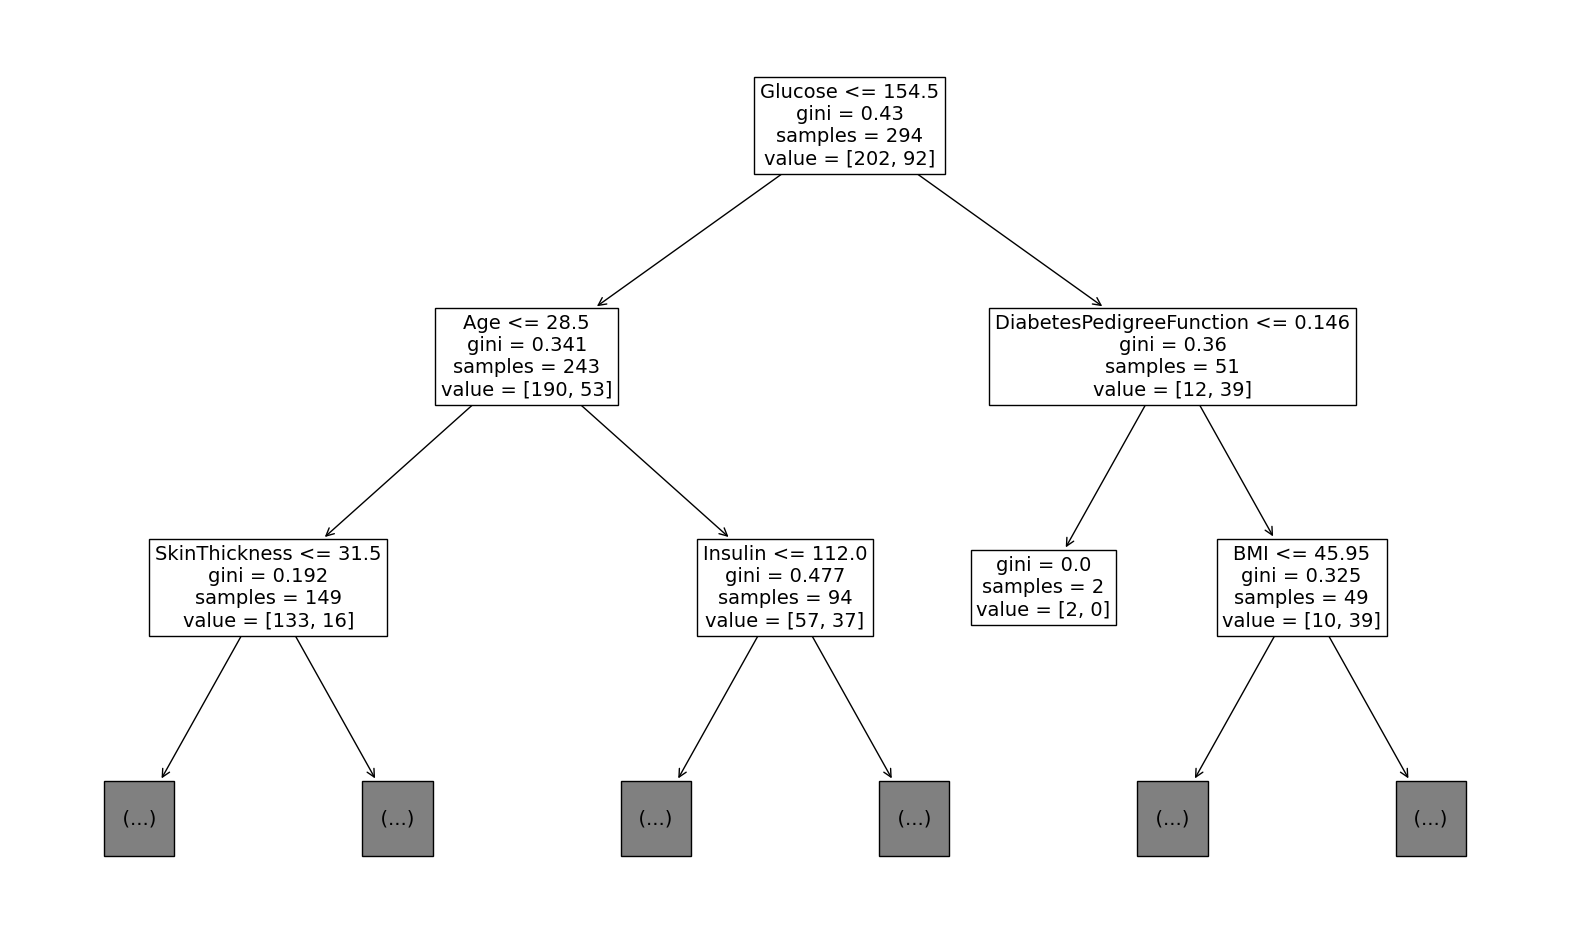

In [107]:
### YOUR CODE HERE ###

plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);